# Feature selection and PCA

<br>

### Task description

* Using the UCI mushroom dataset, perform a feature selection using a classifier evaluator. Which features are most discriminitave?
* Use principal components analysis to construct a reduced space. Which combination of features explains the most variance in the dataset?
* Do you see any overlap between the PCA features and those obtained from feature selection?

<br>

#### UCI Mushroom Dataset

The UCI Mushroom Dataset is a collection of data used to classify mushrooms as either edible or poisonous. It consists of 8,124 samples, each described by 22 categorical features like cap shape, color, odor, and gill size. The goal is to use these characteristics to predict whether a mushroom is safe to eat.

In [1]:
import pandas as pd
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [2]:
# Load the UCI mushroom dataset.
mushroom_data = pd.read_csv('data/agaricus-lepiota.data') # Read the data from the csv file into a dataframe.
mushroom_data.head() # Show the first five rows in the dataset to verify.

,edibility,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


#### Feature selection using a classifier evaluator.

<br>

Determine which features are most discriminative. This means identifying the features that provide the clearest separation between the two classes: edible and poisonous mushrooms.

<br>

To perform feature selection, we will use `SelectKBest` with the `Chi-squared` (Chi2) statistic. SelectKBest selects the top k features from the dataset based on a specified scoring function, in this case, Chi2. This approach reduces the dataset's dimensionality by retaining only the most informative features for the model. The method requires a feature matrix x and a target vector y. Chi2 measures the association between categorical variables and helps determine how well each feature predicts the target variable. Since Chi2 only operates on non-negative integer values, the dataset must be transformed from categorical to numerical values.


In [3]:
# Convert categorical variables into numerical values.
dummies = pd.get_dummies(mushroom_data) 

# All the features in the dataset except for the targ value, edibility_e and edibility_p.
x = dummies.drop(columns=['edibility_e', 'edibility_p'])  

# The target value. 
# It is enough to use only the column edibility_e, as it indicates whether a mushroom is edible (1) or not (0).
y = dummies['edibility_e'] 

selector = SelectKBest(score_func=chi2, k=5) # Choose the top 5 features based on chi-squared scores.
x_new = selector.fit_transform(x, y) # Transform the feature set to only include the selected features.

selected_features = x.columns[selector.get_support()] # Get the selected feature names.

# Print the result
results_df = pd.DataFrame({
  'Selected Features:': selected_features
})
print(results_df)

           Selected Features:
0                      odor_f
1                      odor_n
2                gill-color_b
3  stalk-surface-above-ring_k
4  stalk-surface-below-ring_k


#### Principal Component Analysis (PCA)

<br>

Use PCA to construct a reduced space. Which combination of features explains the most variance in the dataset?

<br>

##### PCA 

PCA is a method used for `dimensionality reduction`. It transforms a large set of features into a smaller set while retaining most of the original dataset's information. The new and smaller set consists of the most informative combinations of features that explain the maximum variance in the dataset. These new features, created through PCA, are called `principal components`. Rather than using the original features directly, PCA creates linear combinations of them, meaning that the principal components are essentially new features derived from the original ones. While the original features are not retained in their original form, they remain "present" within the principal components, as each principal component is a weighted combination of the original features.

In [4]:
print("Original space:",x.shape)

# Perform PCA to reduce the space to 5 principal components.
pca = PCA(n_components=5)
x_pca = pca.fit_transform(x)
print("PCA space:",x_pca.shape)

Original space: (8124, 117)
PCA space: (8124, 5)


In [5]:
# Features contributing most to variance. 
top_feature_indices = [pca.components_[i].argmax() for i in range(x_pca.shape[1])]
top_feature_names = [x.columns[top_feature_indices[i]] for i in range(x_pca.shape[1])]
print("Features contributing most to variance:", ", ".join(top_feature_names))

Features contributing most to variance: ring-type_p, spore-print-color_h, habitat_d, stalk-shape_e, odor_n


Explained variance ratio by each component: [0.16810879 0.13889755 0.09744943 0.06340839 0.04018563]


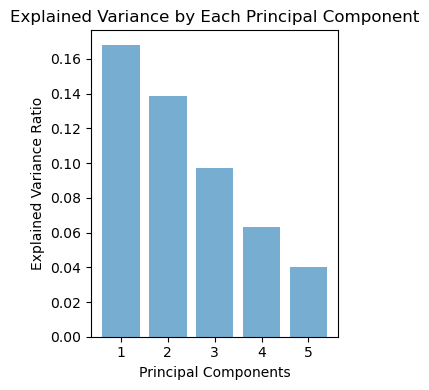

In [6]:
# Explained variance
explained_variance = pca.explained_variance_ratio_
print(f"Explained variance ratio by each component: {explained_variance}")

# Plot explained variance
plt.figure(figsize=(6, 4))
plt.subplot(1, 2, 1)
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.6, align='center')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.title('Explained Variance by Each Principal Component')
plt.xticks(range(1, len(explained_variance) + 1))

plt.tight_layout()
plt.show()


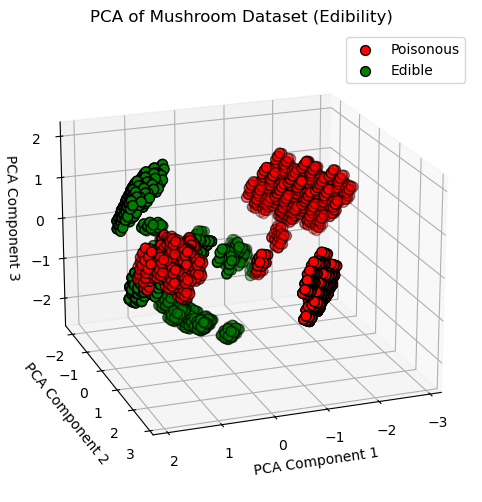

In [7]:
# Create a 3D plot using PCA transformed data
fig = plt.figure(figsize=(8, 6))
ax2 = fig.add_subplot(111, projection='3d')

# Assign edible (1) or poisonous (0) labels to mushrooms
labels = ['Poisonous', 'Edible']
colors = ['r', 'g']  # Red for poisonous, Green for edible.

# Add 3D scatter plot with correct labels.
for label, color in zip([0, 1], colors):
    idx = (y == label)
    ax2.scatter(x_pca[idx, 0], x_pca[idx, 1], x_pca[idx, 2], 
                c=color, label=labels[label], edgecolor='k', s=50)

ax2.set_xlabel("PCA Component 1")  
ax2.set_ylabel("PCA Component 2") 
ax2.set_zlabel("PCA Component 3")
ax2.set_title("PCA of Mushroom Dataset (Edibility)")  

ax2.view_init(elev=20, azim=70)
plt.legend(loc="upper right")
plt.show()

#### Compare PCA and Feature Selection

<br>

The only feature that appears in both analyses is odor_n. This shows that odor_n is important in both feature selection and PCA, indicating it plays a key role in classifying mushrooms and explaining variance in the dataset. The presence or absence of odor helps distinguish between edible and poisonous mushrooms.